## Setup

In [1]:
import utils
import numpy as np
import pandas as pd
from deepchem import deepchem as dc
from sklearn.ensemble import RandomForestRegressor
from deepchem.models import SklearnModel

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_sparse'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jaxlib'


In [2]:
data = utils.load_data('10K.csv', 1000, True)

In [3]:
df_sample = data.sample(n=10)

In [4]:
df_sample

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt
Unnamed: 0,,,,,
5607,6462,-7.721470,O=C(c1ccnn1C1CCCC1)N1CCOC[C@@]12CCOC2,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,305.378
7442,18765,-6.855000,COCC1(C(=O)Nc2c(C)c(C(F)(F)F)nn2C)CCC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,305.300
1803,13174,-9.116660,C[C@H]1CC[C@H](O)CN1C(=O)c1nc2ccccc2cc1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,310.397
2671,2128,-8.784860,O=C(c1ccc(OC(F)(F)F)cc1)N1CCOc2ncccc2C1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,338.285
9716,5559,-3.972120,CC(C)[NH+]1CCC(N(C)C(=O)c2cnc3[nH]ccc3c2)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,301.414
5273,7117,-7.848180,CN(C(=O)[C@H]1COc2ccccc2O1)c1ccc(F)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,287.290
5529,16935,-7.750500,CCOc1ccc([C@H]2CCCN2C(=O)Cn2ccc(C(=O)[O-])n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,342.375
9891,7520,-0.821254,O=C(Nc1ccc(N2CCCC2)nc1)N[C@H]1CC(=O)N(c2ccccc2)C1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,365.437
7983,1772,-6.491500,COC(=O)c1sc(NC[C@H]2CCCO2)nc1C,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,256.327


## Initial model

In [5]:
rf_model = RandomForestRegressor(random_state=57)
model = SklearnModel(model=rf_model)

In [6]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample['molecules'])
y = df_sample['r_i_docking_score'].to_numpy()
ids = df_sample['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [7]:
model.fit(dataset)

## Eval section

In [8]:
from matplotlib import pyplot as plt

preds_tiny = model.predict(dataset)

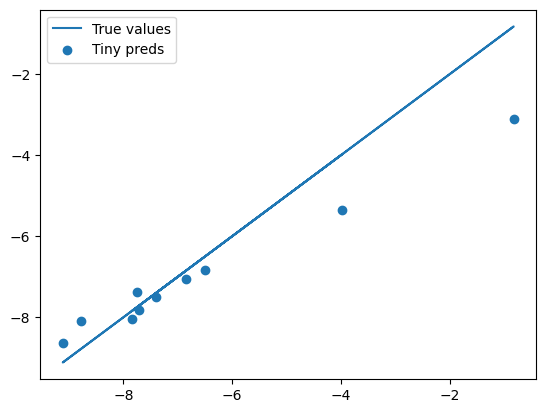

In [9]:
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()

In [10]:
utils.eval(model, dataset)

RMSE   | 0.903
R2     | 0.855
MAE    | 0.614
mean   | -6.979
std    | 1.548


In [11]:
# Remove samples from the larger df
data = data.drop(df_sample.index)

In [12]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [13]:
preds_large = model.predict(dataset)

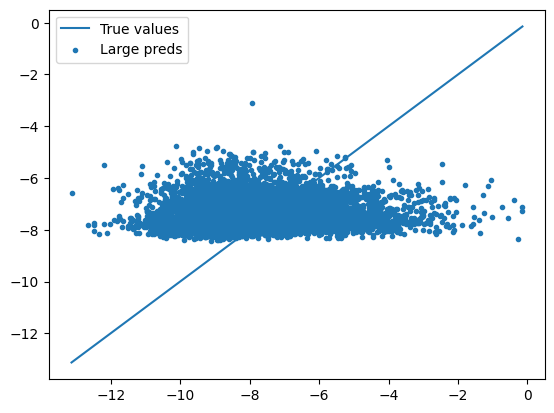

In [14]:
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()

In [15]:
utils.eval(model, dataset)

RMSE   | 1.655
R2     | -0.14
MAE    | 1.317
mean   | -7.381
std    | 0.54


## Grapping more points

In [16]:
preds_large[1]

-7.79973886

In [17]:
dataset.y[1]

-12.6629

In [18]:
abs(preds_large[1] - dataset.y[1])

4.863161140000001

In [19]:
errors = np.abs(dataset.y - preds_large)

In [20]:
data['errors'] = errors
data = data.sort_values(by="errors")
data

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt,errors
Unnamed: 0,,,,,,
7827,11187,-6.603540,CC(=O)N1CCC(C(=O)Nc2ccc(C(C)C)nc2)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,289.379,0.000175
6102,2571,-7.511540,O=C(C[NH+]1CCN(Cc2nc(-c3ccccn3)no2)CC1)N1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,371.465,0.000315
7262,20224,-6.953880,O=C(Nc1ccc2[nH]c(=O)[nH]c2c1)c1ccncc1Cl,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,288.694,0.000428
7537,17398,-6.797380,CCn1ncc2ncn(Cc3ccn(C)c(=O)c3)c(=O)c21,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,285.307,0.000758
4914,13863,-7.986390,CC1CCN(S(=O)(=O)N[C@H](Cc2c[nH]c3ccccc23)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,364.447,0.000898
...,...,...,...,...,...,...
9885,18082,-1.358180,O=C([O-])c1cccc2c1N(S(=O)(=O)c1ccccc1Cl)CC2,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,336.776,6.749274
9896,13971,-0.150473,O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,286.351,6.978383
9893,2451,-0.560302,O=C([O-])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,113.014,6.991472


In [21]:
first_pool = data.head(10)

In [22]:
df_sample_2 = pd.concat([df_sample, first_pool])

In [23]:
df_sample_2

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt,errors
Unnamed: 0,,,,,,
5607,6462,-7.721470,O=C(c1ccnn1C1CCCC1)N1CCOC[C@@]12CCOC2,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,305.378,NaN
7442,18765,-6.855000,COCC1(C(=O)Nc2c(C)c(C(F)(F)F)nn2C)CCC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,305.300,NaN
1803,13174,-9.116660,C[C@H]1CC[C@H](O)CN1C(=O)c1nc2ccccc2cc1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,310.397,NaN
2671,2128,-8.784860,O=C(c1ccc(OC(F)(F)F)cc1)N1CCOc2ncccc2C1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,338.285,NaN
9716,5559,-3.972120,CC(C)[NH+]1CCC(N(C)C(=O)c2cnc3[nH]ccc3c2)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,301.414,NaN
5273,7117,-7.848180,CN(C(=O)[C@H]1COc2ccccc2O1)c1ccc(F)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,287.290,NaN
5529,16935,-7.750500,CCOc1ccc([C@H]2CCCN2C(=O)Cn2ccc(C(=O)[O-])n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,342.375,NaN
9891,7520,-0.821254,O=C(Nc1ccc(N2CCCC2)nc1)N[C@H]1CC(=O)N(c2ccccc2)C1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,365.437,NaN
7983,1772,-6.491500,COC(=O)c1sc(NC[C@H]2CCCO2)nc1C,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,256.327,NaN


In [24]:
# Remove selected points from data again
data = data.drop(first_pool.index)

In [25]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample_2['molecules'])
y = df_sample_2['r_i_docking_score'].to_numpy()
ids = df_sample_2['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [26]:
len(dataset.y)

20

In [27]:
rf_model2 = RandomForestRegressor(random_state=57)
model2 = SklearnModel(model=rf_model2)
model2.fit(dataset)

RMSE   | 0.57
R2     | 0.891
MAE    | 0.343
mean   | -7.115
std    | 1.188


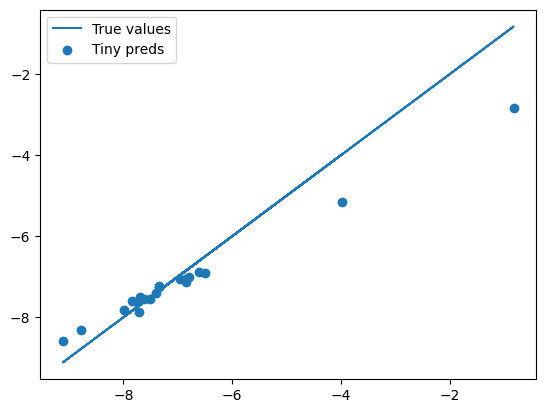

In [28]:
preds_tiny = model2.predict(dataset)
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()
utils.eval(model2, dataset)

RMSE   | 1.727
R2     | -0.241
MAE    | 1.36
mean   | -7.292
std    | 0.59


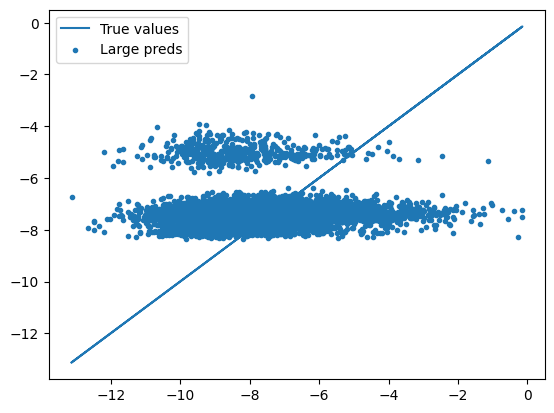

In [29]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

preds_large = model2.predict(dataset)

plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()
utils.eval(model2, dataset)

In [30]:
errors = np.abs(dataset.y - preds_large)
data['errors'] = errors
data = data.sort_values(by="errors")
second_pool = data.head(10)
df_sample_3 = pd.concat([df_sample_2, second_pool])

# Remove selected points from data again
data = data.drop(second_pool.index)

In [31]:
df_sample_3

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt,errors
Unnamed: 0,,,,,,
5607,6462,-7.721470,O=C(c1ccnn1C1CCCC1)N1CCOC[C@@]12CCOC2,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,305.378,NaN
7442,18765,-6.855000,COCC1(C(=O)Nc2c(C)c(C(F)(F)F)nn2C)CCC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,305.300,NaN
1803,13174,-9.116660,C[C@H]1CC[C@H](O)CN1C(=O)c1nc2ccccc2cc1C1CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,310.397,NaN
2671,2128,-8.784860,O=C(c1ccc(OC(F)(F)F)cc1)N1CCOc2ncccc2C1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,338.285,NaN
9716,5559,-3.972120,CC(C)[NH+]1CCC(N(C)C(=O)c2cnc3[nH]ccc3c2)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,301.414,NaN
5273,7117,-7.848180,CN(C(=O)[C@H]1COc2ccccc2O1)c1ccc(F)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,287.290,NaN
5529,16935,-7.750500,CCOc1ccc([C@H]2CCCN2C(=O)Cn2ccc(C(=O)[O-])n2)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,342.375,NaN
9891,7520,-0.821254,O=C(Nc1ccc(N2CCCC2)nc1)N[C@H]1CC(=O)N(c2ccccc2)C1,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,365.437,NaN
7983,1772,-6.491500,COC(=O)c1sc(NC[C@H]2CCCO2)nc1C,<rdkit.Chem.rdchem.Mol object at 0x000001D23AF...,256.327,NaN


In [32]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample_3['molecules'])
y = df_sample_3['r_i_docking_score'].to_numpy()
ids = df_sample_3['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [33]:
rf_model3 = RandomForestRegressor(random_state=57)
model3 = SklearnModel(model=rf_model3)
model3.fit(dataset)

RMSE   | 0.447
R2     | 0.911
MAE    | 0.235
mean   | -7.24
std    | 1.09


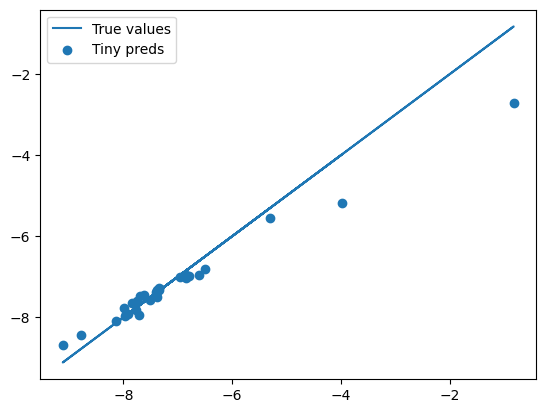

In [34]:
preds_tiny = model3.predict(dataset)
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()
utils.eval(model3, dataset)

RMSE   | 1.706
R2     | -0.21
MAE    | 1.362
mean   | -7.28
std    | 0.511


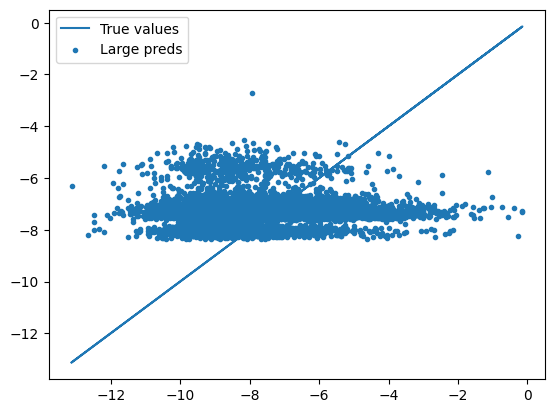

In [35]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

preds_large = model3.predict(dataset)

plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()
utils.eval(model3, dataset)

## Third time

In [36]:
errors = np.abs(dataset.y - preds_large)
data['errors'] = errors
data = data.sort_values(by="errors")
third_pool = data.head(10)
df_sample_4 = pd.concat([df_sample_3, third_pool])

# Remove selected points from data again
data = data.drop(third_pool.index)

In [37]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample_4['molecules'])
y = df_sample_4['r_i_docking_score'].to_numpy()
ids = df_sample_4['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [38]:
rf_model4 = RandomForestRegressor(random_state=57)
model4 = SklearnModel(model=rf_model4)
model4.fit(dataset)

RMSE   | 0.422
R2     | 0.899
MAE    | 0.184
mean   | -7.289
std    | 0.968


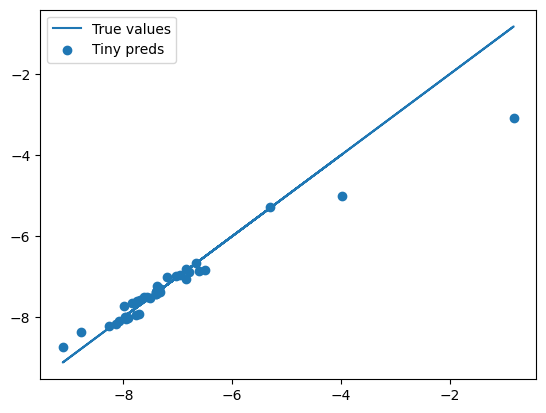

In [39]:
preds_tiny = model4.predict(dataset)
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()
utils.eval(model4, dataset)

RMSE   | 1.719
R2     | -0.228
MAE    | 1.369
mean   | -7.26
std    | 0.565


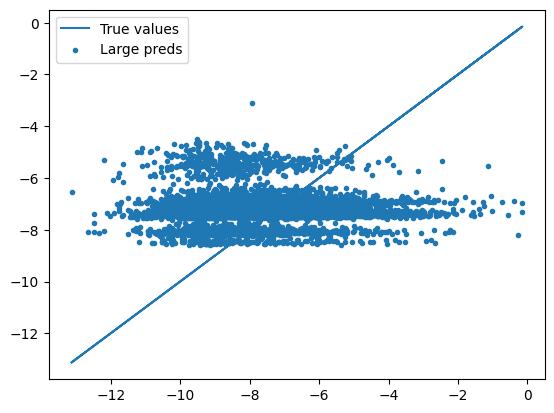

In [40]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

preds_large = model4.predict(dataset)

plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()
utils.eval(model4, dataset)